# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
#Number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [9]:
#Inspect dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [12]:
#Get null counts
print("NULL count for 'call' column:", data.call.isnull().sum())
print("NULL count for 'race' column:", data.race.isnull().sum())

#Get duplicate counts
print("Count of duplicate records:", data.duplicated().sum())

NULL count for 'call' column: 0
NULL count for 'race' column: 0
Count of duplicate records: 0


Note: There are no null values or duplicates in our sample.

# Question 1: What test is appropriate for this problem? Does CLT apply?

In order to apply the appropriat test and use the CLT, we consider two things: 
* Size of sample: is it large? 
* Nature of observations: are they independent? 

In [8]:
#Let's get a closer look at the data in terms of frequencies
##Special Note: both of the variables of interest (b/w and 1/0 are Bernoulli random variables)
w = data[data.race=='w']
b = data[data.race=='b']

print("Number of observations for white resumes:", len(w))
print("Number of observations for black resumes:", len(b))

Number of observations for white resumes: 2435
Number of observations for black resumes: 2435


* The sample includes 2435 observations for each category (b, w), which is larger than 30, making it a large sample. We assume that the observations are independent as the resumes were randomly selected and one person's resume does not affect the others'.

* Since the rate of callbacks per b/w category is compared, the sample size is large, and the observations are independent, both a binomial test and z-test is appropriate for this problem.

In [85]:
#Totals, Callbacks, and Proportions filtered by race

b_all = data.race[data.race == "b"].count()
w_all = data.race[data.race == "w"].count()

call_all = data.call[data.call == 1].count()
nocall_all = data.call[data.call == 0].count()

b_callbacks = data.loc[(data.race == "b") & (data.call == 1), "call"].count()
b_nocallbacks = data.loc[(data.race=='b') & (data.call == 0), "call"].count()

w_callbacks = data.loc[(data.race == "w") & (data.call == 1), "call"].count()
w_nocallbacks = data.loc[(data.race == "w") & (data.call == 0), "call"].count()

print("Total number of black sounding names:", b_all)
print("Total number of white sounding names:", w_all)

print("Total callbacks:", call_all)
print("Total no callbacks:", nocall_all)

print("Number of callbacks for black sounding names:", b_callbacks)
print("Number of no callbacks for black sounding names:", b_nocallbacks)
print("Number of callbacks for white sounding names:", w_callbacks)
print("Number of no callbacks for white sounding names:", w_nocallbacks)

Total number of black sounding names: 2435
Total number of white sounding names: 2435
Total callbacks: 392
Total no callbacks: 4478
Number of callbacks for black sounding names: 157
Number of no callbacks for black sounding names: 2278
Number of callbacks for white sounding names: 235
Number of no callbacks for white sounding names: 2200


In [15]:
##Create a frequency table for callback status by race 
callback_race_table = pd.crosstab(index=data.call, columns=data.race, margins=True)
callback_race_table

race,b,w,All
call,,,
0.0,2278,2200,4478
1.0,157,235,392
All,2435,2435,4870


In [16]:
callback_race_table.index=['No', 'Yes', 'Total']
callback_race_table.columns=['B', 'W', 'Total']
print("Callbacks by Race (Black (B) and White (W)):")
callback_race_table

Callbacks by Race (Black (B) and White (W)):


,B,W,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


### Conclusion: The sample size is large enough to use CTL, and we will test with a proportional z-test to evaluate the data.

# Question 2: What are the null and alternate hypotheses?

From the table above, it appears that white names seem to receive more callbacks (235/2435) and black names receive less (157/2435). 

In order to further evaluate this, the null and alternative hypothesises are stated as follows: 
* Null Hypothesis: The effect of "race" (B) = 0
* Alternative Hypoethesis: The effect of "race" (B) > 0

Our significant level is 95%, with a = 0.05. 

# Question 3: Compute margin of error, confidence interval, and p-value. 
* Try using both the bootstrapping and the frequentist statistical approaches.

In [48]:
#Start by computing the mean and standard deviation
mean_callbacks = np.mean(data.call)
std_callbacks = np.std(data.call)
n_data = len(data)

#NOTE: the "call" field is a binary variable
print("The mean callback is:", mean_callback)
print("The std callback is:", std_callback)
print("The length of the data is:", n_data)

The mean callback is: 0.08049281686544418
The std callback is: 0.27205151319503784
The length of the data is: 4870


In [106]:
mean_b_callbacks = np.mean(data.call[data.race == "b"])
mean_w_callbacks = np.mean(data.call[data.race == "w"])

empirical_diff_means = abs(mean_b_callbacks - mean_w_callbacks)
print("The empirical difference of the mean between w and b callbacks:", empirical_diff_means)

The empirical difference of the mean between w and b callbacks: 0.03203285485506058


Note: The empirical difference of the mean between w and b callbacks can also be interpretted as the difference in proportion of callbacks.

## First, start with bootstrapping for p-value hypothesis testing

In [37]:
#Start bootstrapping approach to statistical evaluation
##Replicate of resampled data array function

def reps(data, function): 
    """Return replicate of a resampled data array."""
    
    #Create resampled array and return stat:
    return function(np.random.choice(data, size=len(data)))

#Bootstrap replicates function

def draw_bsreps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    #Initialize array of replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size): 
        bs_replicates[i] = reps(data, func)
        
    return bs_replicates

In [38]:
#Seed the random number generator
np.random.seed(25)

#Generate shifted arrays - we are doing a two-sided test
b_shift = b_callbacks - mean_b_callbacks + mean_callbacks
w_shift = w_callbacks - mean_w_callbacks + mean_callbacks

#Generate 10,000 bootstrap replicates from our shift arrays
bsreps_b = draw_bsreps(b_shift, np.mean, 10000)
bsreps_w = draw_bsreps(w_shift, np.mean, 10000)

#Compute the difference of means of the replicates
bsreps_diff_means = bsreps_b - bsreps_w

#Compute p-value
p = np.sum(bsreps_diff_means <= empirical_diff_means) / len(bsreps_diff_means)
print("The p-value of the replicates is:", p)

The p-value of the replicates is: 0.0


Note: This small p-value gives us strong evidence against the null hypothesis (there is a higher than 0.05 chance of observing proof in favour of the alternative hypothesis). Therefore, we cannot claim that the mean callback rate is the same for the black names and the white names. 

## Second, try with frequentist statistics

In [46]:
from scipy.stats import norm

#Start by computing margin of error and confidence interval

z_critic = norm.ppf(0.95)
print(z_critic)

1.6448536269514722


In [86]:
#To calculate the standard error, we need to compute probabilities of the Bernoulli distribution

#b_all
#w_all

#call_all
#nocall_all

#b_callbacks 
#b_nocallbacks

#w_callbacks
#w_nocallbacks 

w_prop_all = (w_all) / len(data)
b_prop_all = (b_all) / len(data)

b_prop_call = (b_callbacks) / (b_all)
b_prop_nocall = (b_nocallbacks) / (b_all)

w_prop_call = (w_callbacks) / (w_all)
w_prop_nocall = (w_nocallbacks) / (w_all)


print("The proportion of all white sounding names is:", w_prop_all)
print("The proportion of all black sounding names is:", b_prop_all)

print("The proportion of black sounding names with callback is:", b_prop_call)
print("The proportion of black sound names with no callback is:", b_prop_nocall)

print("The proportion of white sounding names with callback is:", w_prop_call)
print("The proportion of white sounding names with no callback is:", w_prop_nocall)

The proportion of all white sounding names is: 0.5
The proportion of all black sounding names is: 0.5
The proportion of black sounding names with callback is: 0.06447638603696099
The proportion of black sound names with no callback is: 0.9355236139630391
The proportion of white sounding names with callback is: 0.09650924024640657
The proportion of white sounding names with no callback is: 0.9034907597535934


In [88]:
#Compute the standard error of each b and w
w_std_error = np.sqrt((w_prop_call * (1-w_prop_nocall))/(w_all))
b_std_error = np.sqrt((b_prop_call * (1-b_prop_nocall))/(b_all))

std_error = np.sqrt((w_prop_call * (1-w_prop_nocall))/(w_all) + (b_prop_call * (1-b_prop_nocall))/(b_all))

print("The standard error for white names is:", w_std_error)
print("The standard error for black names is:", b_std_error)
print("The standard error is:", std_error)

The standard error for white names is: 0.001955777357746891
The standard error for black names is: 0.001306625724111752
The standard error is: 0.0023520918043277925


In [112]:
#Finally, compute the margine of error, confidence interval and p-value

##Calcaulte the z critical value
z_critic = norm.ppf(0.975)
print("The z critical value is", z_critic)

##Calculate the moe
moe = z_critic * std_error
print("The margin of error is", moe)

The z critical value is 1.959963984540054
The margin of error is 0.0046100152248143055


Note: This means that the difference in the proportion of names receiving call backs is the difference of the means +/- the margin of error.

In [113]:
print("The empirical difference of the mean between the two groups receiving callbacks is:", empirical_diff_means)
print("With +/-", moe)
print("Which equals", empirical_diff_means - moe, "and", empirical_diff_means + moe)

The empirical difference of the mean between the two groups receiving callbacks is: 0.03203285485506058
With +/- 0.0046100152248143055
Which equals 0.027422839630246273 and 0.036642870079874885


In [114]:
#Computing the confidence interval another way
[CIU, CIL] = z_critic * std_error * np.array([-1,1])
CIUpper = empirical_diff_means + CIU
CILower = empirical_diff_means + CIL

print("With a 95% confidence interval, the range is:", CIUpper, "and", CILower)

With a 95% confidence interval, the range is: 0.027422839630246273 and 0.036642870079874885


In [115]:
#Computing the z-statistic with proportions
import statsmodels.stats.proportion as props

z_test, p = props.proportions_ztest([w_callbacks, b_callbacks], [w_all, b_all])
print(z_test, p)

4.108412152434346 3.983886837585077e-05


Note: The z-statistic of 4.11 from a proportional test and small p-value also indicate that we should reject the null hypothesis that race has no effect on callbacks. 

### Conclusion: Both boostrapping a p-value hypothesis test and computing frequentist statistics indicate that we should reject the null hypothesis and that race has an effect on callbacks.

# Question 4: Write a story.
* Describing the statistical significance in the context or the original problem.

The original problem asked us to evaluate whether or not race, as identified by either a "black" name or a "white" name (which were randomly distributed), has a statistically significant impact on resume callback rate. This analysis proposed a null hypothesis that race does not have an effect and an alternative hypothesis that race does have an effect. The analysis used both p-value bootstrapping and frequentist statistical methods to evaluate the data provided. The analysis rejects the null hypothesis with evidence from both methods, as Z is far outside the critical value of +/- 1.96 at 4.11. Both tests also found a low p-value below 0.05. We are 95% confident that black sounding names are less likely to be called back and conclude that black sounding names are more than 4 standard deviations from the mean, compared to white sounding names. 

# Question 5: Does your analysis mean that race/name is the most important factor in callback success? 
* Why or why not? If not, how would you amend your analysis?

The analysis does not conclude findings on other variables in the data. The analysis would have to include those variables and compare the effects on callback rate and compared to the effect of race/name. This could include a correlation analysis or logistical regression methods.

In [117]:
#Let's take a look at the other variables
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

Note: Callback rate would likely be influenced by a few of these: computerskills, specialskills, city, etc. as they are likely to indicate match potential for a job. Additionally, all humans are susceptible to bias and error in judgment. Likely variables that could bias callback rate could include sex, as well.

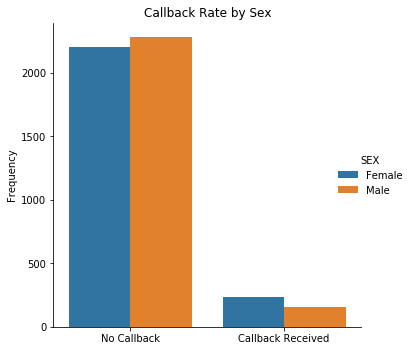

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

#Let's quickly get a glimpse to see if sex could have an effect
fig = sns.catplot(x='call',hue='race', data=data, kind='count')

fig._legend.set_title('SEX')
for text, label in zip(
    fig._legend.texts, 
    ['Female', 'Male']
): text.set_text(label)
fig.set_xticklabels(['No Callback','Callback Received'])
fig = plt.xlabel('')
fig = plt.ylabel('Frequency')
fig = plt.title('Callback Rate by Sex')

Note: This just shows that evaluating race in its effect on callback rate should be put in context / compared to other factors in the data.